<table>
   <tr>     
    <td><img src="./images/logo-qiskit.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
    <td>  </td>
    <td><img src="./images/logo-IBM.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="300 px" align="left"></td>
   </tr>
</table>
<br>


# <center>Welcome </center>


# <center> Lab-2 : Quantum Circuits </center>


<img src="./images/logo-hackathon.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="800 px" align="center"></td>


### Content :
<ol>
    <li>Warmup</li>
    <br>
    <li>Exercises</li>
    <br>
    <li>Challenges</li>  
</ol>




<div class="alert alert-block alert-info">

# 1. Warmup
</div>

### 1.1 What is the result of this circuit ?

<img src="./images/3cx.png" width="500"/>

Hint : qiskit and the composer do not provide formal calculation, but you can try with a few values.
You may just decide to go with matrices multiplication...

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
qc = QuantumCircuit(2)
#qc.initialize([0,1],0)
#qc.initialize([1,0],1)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.measure_all()
qc.draw()


┌───┐      ░ ┌─┐   
   q_0: ──■──┤ X ├──■───░─┤M├───
        ┌─┴─┐└─┬─┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├──■──┤ X ├─░──╫─┤M├
        └───┘     └───┘ ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

In [2]:
svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

In [3]:
qc = QuantumCircuit(2)
#qc.initialize([0,1],0)
#qc.initialize([1,0],1)
qc.cx(0, 1)
qc.cx(1, 0)
qc.cx(0, 1)
qc.draw()


usim = Aer.get_backend('unitary_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, pretext="\\text{Circuit = } ")


<IPython.core.display.Math object>

### 1.2. Create a circuit with 4 qubits $q_0, q_1, q_2, q_3$ with the following rules:

- swap $q_1$ with $q_3$ if $q_0 == 0$ 
- swap $q_2$ with $q_3$ if $q_0 == 1$
- leave $q_0$ unchanged at the end

- _you may use X, CNOT, CSWAP and CCNOT_


In [4]:
qc = QuantumCircuit(4)
qc.x(0)
qc.cswap(0,1,3)
qc.x(0)
qc.cswap(0,2,3)
qc.draw()

svsim = Aer.get_backend('statevector_simulator')
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit_textbook.tools import array_to_latex
array_to_latex(final_state, pretext="\\text{Statevector} = ")


<IPython.core.display.Math object>

### 1.3 Create a circuit with qubits $q_0, q_1, q_2, q_3$  with the following rules: 

- swap $q_2$ with $q_3$ if and only if $q_0 == 1$ and $q_1 == 1$ 
- you may use an additionnal qubit $q_4$ (will start and end with value |0>)


- _you may use X, CNOT, CSWAP and CCNOT_


In [5]:
qc = QuantumCircuit(5)
qc.toffoli(0,1,4)
qc.cswap(4,2,3)
qc.draw()

q_0: ──■─────
       │     
q_1: ──■─────
       │     
q_2: ──┼───X─
       │   │ 
q_3: ──┼───X─
     ┌─┴─┐ │ 
q_4: ┤ X ├─■─
     └───┘

<div class="alert alert-block alert-info">
    
# 2. Execrises
</div>

Let's review two of the basics quantum algorithms : Bernstein-Vazirani and Deutsch-Josza

### 2.1 Bernstein-Vazirani

In [6]:
%matplotlib inline
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, Aer
from qiskit.tools.visualization import plot_histogram
backend = Aer.get_backend('qasm_simulator')

More informations here : https://youtu.be/sqJIpHYl7oo and there : https://community.qiskit.org/textbook/ch-algorithms/bernstein-vazirani.html


Let $f_s$ be a function from $\{0,1\}^n$ to $\{0,1\}$, we know it returns XOR of bit to bit products ($and$) for $x$ as input and a "secret" string $s$ of length $n$ : 

\begin{equation}
f_s(x) = s_0.x_0 \oplus s_1.x_1 \oplus s_2.x_2 \oplus \hspace{0.3cm} ... \hspace{0.3cm} \oplus s_{n-1}.x_{n-1}  
\end{equation}

Calssicaly, $n$ calls $f_s(x)$ aree needed to $s$ as follows: 

\begin{equation}
f_s(1000...0) = s_0 \\
f_s(0100...0) = s_1 \\
f_s(0010...0) = s_2 \\
... \\
f_s(0000...1) = s_{n-1}
\end{equation}

Bernstein-Vazirani algorithm make it in one single call (but uses $𝓞(n)$ gates ...) 

The algorithm is as follows : 

<img src="./images/bv.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">


This algorithm is based on what we call the "phase-kick back" : 




This algorithm is based on what we call the "phase-kick back" : 

Let's compare what happensto qubit $q_0$ in these two cases : 


1- $q_0$ does not interfere with $q_1$:

<img src="./images/BV-case1.png" width="500"/>

In this case measuring $q_0$ will result in state $|0\rangle$

2- le qubit 0 contrôle le qubit 1:

<img src="./images/BV-case2.png" width="500"/>

In case 2, let's analyse what happens at each step 
The 2-qubits system starts in state $|00\rangle$. 


Before CNOT, the system is in state  $H\otimes HX |00\rangle$

\begin{equation}HX = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&1\\1&-1 \end{pmatrix}\times \begin{pmatrix} 0&1\\1&0\end{pmatrix} = \frac{1}{\sqrt{2}}\begin{pmatrix} 1&1\\-1&1 \end{pmatrix}\end{equation}


\begin{equation} H \otimes HX = \frac{1}{2}\begin{pmatrix} 1&1&1&1\\-1&1&-1&1\\1&1&-1&-1\\-1&1&1&-1\\ \end{pmatrix} \end{equation}

So: 
\begin{equation} H \otimes HX |00\rangle = \frac{1}{2}\begin{pmatrix} 1&1&1&1\\-1&1&-1&1\\1&1&-1&-1\\-1&1&1&-1\\ \end{pmatrix}\times\begin{pmatrix} 1\\0\\0\\0\\ \end{pmatrix} = \frac{1}{2} \begin{pmatrix} 1\\-1\\1\\-1\\ \end{pmatrix} \end{equation}

Then we apply CNOT to this state : 

\begin{equation} CNOT \times \frac{1}{2}\begin{pmatrix} 1\\-1\\1\\-1\\ \end{pmatrix} = \begin{pmatrix} 1&0&0&0\\0&1&0&0\\0&0&0&1\\0&0&1&0\\ \end{pmatrix} \times \frac{1}{2} \begin{pmatrix} 1\\-1\\1\\-1\\ \end{pmatrix} = \frac{1}{2}\begin{pmatrix} 1\\-1\\-1\\1\\ \end{pmatrix} \end{equation}

We end with $H\otimes I$ :

\begin{equation} (H\otimes I )\frac{1}{2}\begin{pmatrix} 1\\-1\\-1\\1\\ \end{pmatrix} 
= \frac{1}{\sqrt{2}} \begin{pmatrix} 1&0&1&0\\0&1&0&1\\1&0&-1&0\\0&1&0&-1\\\end{pmatrix} \times \frac{1}{2}\begin{pmatrix} 1\\-1\\-1\\1\\ \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 0\\0\\1\\-1\\ \end{pmatrix} = \frac{1}{\sqrt{2}} (|10\rangle - |11\rangle )\end{equation}

Measuring $q_0$ results in $|0\rangle$. 

This is phase kickback, and this is what we use in the BV algo.

In [7]:
# choose the value of s ("hidden" value, to be discovered")
s = '101001' 

In [8]:
# prepare your BV algo here (use bv as circuit name, or change bv in the execution parameter, next cell)
# allow for s to be of variable length





### 2.2 Deutsch-Josza


#### Deutsch

<img src="./images/Deutsch.jpg" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="center">

Let $f$ be a function from $\{0,1\}$ to $\{0,1\} :  f : x \in \{0,1\} ⟼ \{0,1\}$, it can be *constant* or *balanced*. To find out if it is constant or balanced, a classical algorithm will need to evaluate $f$ for both 0 and 1 input values. 



In 1985, David Deutsch show that a quantum algorithm can find out with only one evaluation of $f$. 
Seven years later, David Deutsch et Richard Josza extend this algorithm to the case with $N$ input bits ($2^N$ possible values)


#### Lets build the four functions  $f_0, f_1,f_2,f_3$, and run Deutsch algorithm. Result $0$ indicates a constant function, and  $1$ indicates a balanced function:

<img src="./images/f0f1f2f3.png" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="400 px" align="center">

<img src="./images/deutschfunctions.png" alt="Note : In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">


<img src="./images/DeutschAlgo.png" alt="Note : In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="600 px" align="center">


In [9]:
#
#
# Your code here 
#
#

<!div class="alert alert-block alert-info">
Deutsch justification :  

(Note  $\oplus$ is xor (or modulus 2 addition) 

Let's analyze the states along the circuit. Inital state: 
\begin{equation}
|\psi_1⟩ = |0⟩\times|1⟩
\end{equation}

Theen both qubits go through Hadamard : 
$|0⟩$ goes to $\frac{1}{\sqrt{2}}(|0⟩+|1⟩)$
and  
$|1⟩$ goes to $\frac{1}{\sqrt{2}}(|0⟩-|1⟩)$

So we have state : $|\psi_2⟩$

\begin{equation}
|\psi_2⟩ = \frac{1}{\sqrt{2}}(|0⟩+|1⟩) \times \frac{1}{\sqrt{2}}(|0⟩-|1⟩)
\end{equation}

Both $\frac{1}{\sqrt{2}}$ multiply together, and we develop : 

\begin{equation}
|\psi_2⟩ = \frac{1}{2}(|0⟩\times(|0⟩-|1⟩) + |1⟩\times(|0⟩-|1⟩)
\end{equation}

With $|x⟩$ having value in $|0⟩$ and  $|1⟩$ we can factor like this : 

\begin{equation}
|\psi_2⟩ = \frac{1}{2}\sum_{x=0}^{x=1}|x⟩(|0⟩-|1⟩)
\end{equation}

Then:

\begin{equation}
|\psi_2⟩ = \frac{1}{2}\sum_{x=0}^{x=1}(|x⟩|0⟩-|x⟩|1⟩)
\end{equation}

Going to $|\psi_3⟩$ the second qubit state gets the xor of its value and the value of $f(x)$. So $|0⟩$ goes to  $|0\oplus f(x)⟩$ and $|1⟩$ goes to $|1\oplus f(x)⟩$ :


\begin{equation}
|\psi_3⟩ = \frac{1}{2}\sum_{x=0}^{x=1}(|x⟩|0\oplus f(x)⟩-|x⟩|1\oplus f(x)⟩)
\end{equation}

With:
- if $f(x) = 0$ then $0\oplus f(x) = 0$ and $1\oplus f(x) = 1$

- if $f(x) = 1$ then $0\oplus f(x) = 1$ and $1\oplus f(x) = 0$  

which gives:

- if $f(x) = 0$ then $|x⟩|0\oplus f(x)⟩- |x⟩|1\oplus f(x) ⟩ = |x⟩|0⟩-|x⟩|1⟩ =|x⟩(|0⟩-|1⟩$

- if $f(x) = 1$ then $|x⟩|0\oplus f(x)⟩- |x⟩|1\oplus f(x) ⟩ = |x⟩|1⟩-|x⟩|0⟩ = -|x⟩(|0⟩-|1⟩$

Then: 

$|x⟩|0\oplus f(x)⟩ - |x⟩|1 \oplus f(x) ⟩ = (-1)^{f(x)}|x⟩(|0⟩-|1⟩)$

and we can write:

\begin{equation}
|\psi_3⟩ = \frac{1}{2}\sum_{x=0}^{x=1}(-1)^{f(x)}|x⟩(|0⟩-|1⟩) = \frac{1}{2}\left(\sum_{x=0}^{x=1}(-1)^{f(x)}|x⟩\right)(|0⟩-|1⟩
\end{equation}

\begin{equation}
|\psi_3⟩  = \frac{1}{2}\left((-1)^{f(0)}|0⟩ + (-1)^{f(1)}|1⟩\right)(|0⟩-|1⟩)
\end{equation}

We now have to get $q_0$ throught thee last $H$ gate: 


\begin{equation}
|\psi_4⟩  = \frac{1}{2}\left((-1)^{f(0)}\frac{1}{\sqrt{2}}(|0⟩+|1⟩) + (-1)^{f(1)}\frac{1}{\sqrt{2}}(|0⟩-|1⟩)\right)(|0⟩-|1⟩)
\end{equation}

\begin{equation}
|\psi_4⟩ = \frac{1}{2\sqrt{2}}\left(\left((-1)^{f(0)}+(-1)^{f(1)}\right)|0⟩ + \left((-1)^{f(0)}-(-1)^{f(1)}\right)|1⟩\right) (|0⟩-|1⟩)
\end{equation}

And we see that: 

- if $f(0) = f(1)$ then measuring $q_0$ will result in state $|0⟩$
- if $f(0) ≠ f(1)$ then measuring $q_0$ will result in state $|1⟩$

Deutsh-Josza expand the same problem to $N$ bits, we are egiven a function from 0,1 exp N to 0,1, and we are told that f is either constant or balanced. 

Here is a demo:



In [10]:
# initialisations 

import numpy as np

from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

from qiskit.visualization import plot_histogram

/Users/clement/opt/anaconda3/envs/myquantumenv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [11]:
def dj_oracle(n, case): 
    # on construit un circuit, avec n+1 qubits 
    
    oracle_qc = QuantumCircuit(n+1)
    
    # cas de l'oracle équilibré (balanced)
    if case == "balanced": 
        # cnot gate de chaque qubit sur le qubit de sortie
        for qubit in range(n):
            oracle_qc.cx(qubit,n)
            # ca fait qu'on on flip le qubit n autant de fois 
            # qu'on a un 1 en entrée, donc selon la parité du nombre
            # de 1, il finit à 0 ou à 1.
            
    # cas de l'oracle constant
    if case == "constant": 
        # il est constant à 0 ou à 1, on tire au sort un 
        # entier 0 ou 1 ce qui determine quel est le résultat (constant) de la fonction. 
        zero_un = np.random.randint(2) 
        if zero_un == 1:
            oracle_qc.x(n)
            # on sort toujours 1 quelque soit l'entrée
        # sinon rien. le qubit n est à 0... toujours
        
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Oracle"
    return oracle_gate
            

In [12]:
def dj_algo(n, case='random'): 
    dj_circuit = QuantumCircuit(n+1,n)
    
    # superpose les n premiers (0 à n-1) 
    for qubit in range(n): 
        dj_circuit.h(qubit)
        
    # on s'occuppe du dernier qubit (état moins)
    dj_circuit.x(n)
    dj_circuit.h(n)

    # si l'utilisateur n'a pas spécifié le parametre random ou bien 
    # si il l'a spécifié à random
    if case == 'random':
        random = np.random.randint(2)
        if random == 0: 
            case = 'constant'
        else: 
            case = 'balanced'
    # maintenant on crée l'oracle :
    oracle = dj_oracle(n,case)
    # et on l'ajoute au circuit que nous sommes en train de construire:
    dj_circuit.append(oracle, range(n+1))
    # range(n+1) est la liste des qubits que circuit "connecte" à oracle
    
    # et on termine le circuit avec les H et les measurement
    for i in range(n):
        dj_circuit.h(i)
        dj_circuit.measure(i, i)
    
    return dj_circuit
        
    

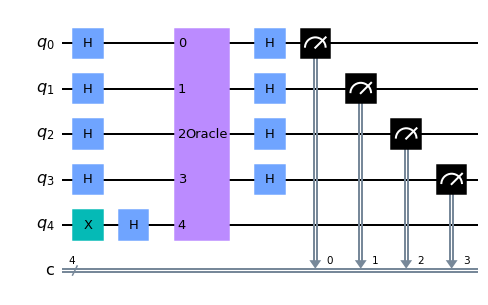

In [13]:
n = 4
dj = dj_algo(n)
dj.draw(output= 'mpl')

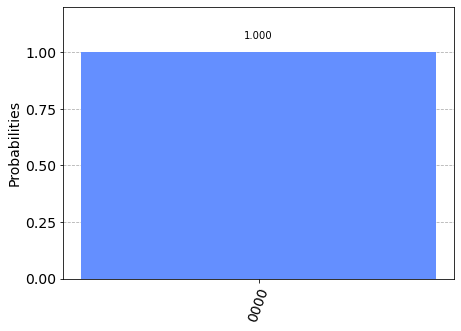

In [14]:
# execution sur le simulateur local
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

dj = dj_algo(n, 'constant')
results = execute(dj, backend = backend, shots = shots).result()
answer = results.get_counts()

plot_histogram(answer)

In [15]:
backend = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >= (n+1) and 
                                       not x.configuration().simulator and x.status().operational == True))

print("least busy backend: ", backend)

%qiskit_job_watcher
 
dj = dj_algo(n, 'balanced')
job = execute(dj, backend = backend, shots = shots, optimization_level = 3)


least busy backend:  ibmq_belem


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

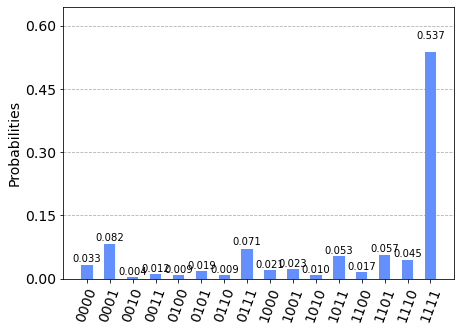

In [16]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)

# 3. Challenges

# 3.1 Challenge 1 : Four states coding

## Quantum Cryptography : BB84

### You can also ref to BB84.pdf in the GitHub repo

**[BB84](https://en.wikipedia.org/wiki/BB84)** protocol was set up in 1984 by one of our famous IBM'ers Charles Bennett with his colleague Gilles Brassard. 
It has been experimented a few years later in the first demonstration of quantum key distribution  : [quantum key distribution](https://en.wikipedia.org/wiki/Quantum_key_distribution) by Charles Bennett and John Smolin in IBM [C. H. Bennett, F. Bessette, G. Brassard, L. Salvail, and J. Smolin, J. of Cryptography **5**, 3 (1992) ]. Charles and John are still part of the quantum IBM team. 

<img src="./images/charlie_john_qkd.jpg" width="500"/>
<center>Charles Bennett and John Smolin at T.J. Watson IBM research center.</center>

BB84 protocol allows to communicate a cryptographie key from one point to another and knowing that it has not been compromised. 


## BB84 Protocol 

The steps are the following : 

1. Alice chooses two random bit strings of length  $n$ : $k$ and $b$. The list $k$ has the key value. The list $b$ represents the bases choice for Alice to encode the bits of $k$. When  $b_i=0$ (meaning if the  $i^{th}$ base bit is zero ), she encodes the $i^{th}$ qubit in the standard base $\{|0\rangle, |1\rangle \}$, and if $b_i=1$, she uses the base  $\{|+\rangle, |-\rangle \}$, where $|+\rangle:=\frac{1}{\sqrt{2}}(|0\rangle +|1\rangle)$, $|-\rangle:=\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle)$. 

This can be showned as follows : 


<img src="./images/encoding_Alice.png" alt="drawing" width="300"/>

2. After endoding $n$ bits, Alice sends them to Bob. He chooses a random bit string $\tilde{b}$ of length $n$ for the measurement bases he will be using. Bob records his measurement results  $\tilde{k_i}$ along with the bases used $\tilde{b_i}$, in an array.

3. Then Alice and Bob compare their bases $b_i$ and $\tilde{b}_i$. Whenever  $b_i \neq \tilde{b}_i$, Bob did not measure in the same base Alice did encode. The probability of having measured the correct value for $k_i$ is $\frac{1}{2}$, in this case this position is discarded. Howeever, if $b_i = \tilde{b}_i$, then the qubit was preepared and measured in the same basis (and if noboby did spy on the communication) Bob did measure a correct value : $\tilde{k}_i = k_i$. These values make the key 

## Example : 

Let's assume Alice random key value is :  $k=`0111001`$ and her bases choice : $b=`1101000`$, and let's assume Bob's bases are : $\tilde{b}=`1001101`$. Look at the values below and note that when bases eare not hte same Bob has one chance out of two to get a correct measurement. 
<img src="./images/example_bb84.png" alt="drawing" width="600"/>

In this case, the key is '0110', and to know if it has been seen by Eve, Alice and Bob will have to sacrifice some of theses bits. If a measurement was made during the distribution, le qubit state would have change with probability $\frac{1}{4}$. By verifying $m$ bits values, the probability of not detecting Eve decays as $\left(\frac{3}{4}\right)^m$. So if the verify enough bits, they will gain confidence that Eve did not spy. 

### Message encryption

One the key is known and secretely has been secretly distributed, Alice and Bob can use it very easily  :  [ref Masque Jetable](https://fr.wikipedia.org/wiki/Masque_jetable) : Alice just adds bitwise modulo 2 the two lists.  (in other words she performs bitwise XOR). With the above example, key is $\text{key}=`0110`$. Secret message is $m=`1100`$, so encrypted message is : $c=m\oplus \text{key (mod 2)} = `1010`$. Bob can decipher in doing the same thing : add the key to the message : $m=c\oplus \text{key (mod 2)}$.

## workshop : 

In this notebook you will be in Bob's role, and with Alice you will generate a key unsing BB84 protocol, then you will beable to decodee Alice's message.

---

There will be 4 steps : 

1. Alice prepares her key and bases. The function (provided) `alice_prepare_qubit` is used to send to you the qubits states. 

2. Bob (you) measure the recevied qubit states in your basis list, you will have to code the function  `build_bob_measure_circuit`. This function receives an index to point in the qubits and in Bob's basis list as well as in the quantum circuit list (which has prepared Alice's qubit state). The function returns a quantum circuit which can be appended to Alice's circuit used to prepare her qubit. Bob circuit simply performs a measure about Bob's base, for each index position. 

3. Then you will have to build the code for making the key Alice and Bob will agree on (by discarding the values that have been emitted and received on non identical basis).

4. Finally, we will be able to write the function to decipher Alice's massage with the key. You generate a bit string, which is a morse code text, you will need to make it readable. 

---

This workhop is derived from the IBM Quantum Computing Challenge, on may 4th, 2020. 

### Setup

In [33]:
# import libraries
import BB84HO
from random import randint
from qiskit import QuantumCircuit, execute, Aer
backend = Aer.get_backend('qasm_simulator')

bases_length = 1500

In [34]:
# clef aléatoire
alice_key = ""
for i in range(bases_length): 
    alice_key += str(randint(0,1))

# bases aléatoires
alice_bases = ""
for i in range(bases_length):
    if randint(0,1):
        alice_bases += "z"
    else:
        alice_bases += "x"
        
print(alice_key)
print(alice_bases)

1011001001111010111010000001011011111010100110110010101111110101100111010011111101001011110000111010101100011110100111001000110011000110000110110111011101010000101100011001111100000010001000110000001010000000110000111001000101110011110100000000001110111001011100101101101110001101110001011001010011001010110100011001100010100000100000000100101010101101011100100100011010001010010101001110000101000010010001100010110010111110100111101010010100100000011010110110001010111000010000100111101110000010100111100010111101001000100000111111011110110111010110100011000011001010011111100110101100010110110001100000101110100010100100011011111100000110110001100101100011101001001011110001000011100000101001001110101111101111000001100110110010010001001111100110110011111110010001010111100111011110000001101010110011101101011110000000000000010110011101100100110100010011101000111110101010111100101101011011111111110111010111010101011000010001011100001010010000101100010000101001101100000110101000101010010101100101

### Bob prepares his bases :

In [35]:
bob_bases = ""
for i in range(bases_length):
    if randint(0,1):
        bob_bases += "z"
    else:
        bob_bases += "x"
        
print('Bob\'s bases :', bob_bases)

Bob's bases : xzzzxxxzzxxzzxxxxzzzzxzzxxxxxzzxzzxzzxzzxzxzxzzzzxxxzxxxxzzxzxxxzzxxxxxxzxzxzxzzxxzzzxzzzzxzzxzxzxxxzzzxxxxxzxxxzxzzzzzxxzzzzzxxzxxzxzzxzzxzzxzzxxxzxxzzxzzxzxzxxzxzzzzzxxxxzxxxzxxxxxxxxxzxzxxzxxxxxzxzxzxxxzxxxxxxzxzzzxzxzxxxzzzxxxxzxzxzxzzxxxxzzxxzzxxxzxxzzxxzxzzzzxzxxxzxxzxzxxzzzzxxzxzxxxzxxxzxxzxzxxzzzxxxzxzxxzzxzxzzxxxxzxzxxxzxzzzzxzxxzzzzzzzzzxxxzxxxxzzxzxzzxxzxzxxzzxzxzzxzxxzxxzxzzzzxzxxzzzzxzxxzzxzxxxzzxxxzzzxzxxzzxxzxzzxzxxzxzxxxxxzxxxzzzxxzzxxzxxxxxzxxzxxxxzxzxzxxxzzzzzzzzzzzxzzxxxxxxxzzzxzzzzxzzxxxzzzxzzxxzxzxzzxxzxxzzxzzzxxxxzxxxxzzxxxzzzxzzzxxxxzzxzzxxzxxzxzxxxzzzzxzzzxxzzzzzxxzxxxxzxxxzzxxxzzzxzxzxxxzzzzxzxxxzxxzxxxzzzxxxzzzzzzxzzzxzzzzxzxzzzzzxzxzxxzxxxzzzzzzxxzxxzxzxxzxzzzxxxxxxzxxxxzzxzzzxxxxzzxzxxxzxxxxzzxzzxzzxxzxzxxxzzxxxzzzxxzzxxzzxxxxxxxxzzzxzxzxzxzxzxzzxzxzxxzxxxzzxzzzxxzxxxxzzzzzzzzxxxzxxzxxzxzxxzzxzzxxxxxzxzxxxxxxxzzxzzzxxzzxxzzzzzxzzxxzxzxzxxxxzzzxxzxxzzxzzxzzxzxxxzzxxxzxzxzzxxxxzxxzxxzzzzxzzxxzxxzxzxzzxzzxxxzzxxxxzzzzzzxzzxzzxzxzzzzxzxzxxxzzzzzzxz

### Now Bob performs the measurements (with his bases) on states prepared by Alice (with her key and bases): 

In [86]:
bob_bases

'zzzxzzzzzxzzxxzxzxzxxzxxzzzzxxzxzzzxxzxzxxzxxxxxxzzzzzzxxzzxzxzzxxzxxxzxxxzxxzxzzzxxzxzzxxzzzzzzxxxxzzzzxzxxzxxzzzxzzxxxzxzzxzzxzzzzxxzxxzzzzzxxxzzxxzxxzxxzzzzxxzzzzzxzzxxxxzxxxxzxxxxxzxzxzxzzzxzzxxxxxzxxzzzzxxxzxzxzxxxxzzzxzxzzxxxzzzzxxxxzxzzzzzxxzzzxxxzzzzxzzzzzzxxzzzzxzzzxzzzxxxzxzzzxxxxzxzzzxxxzzzzxxzzzxxzzxzxzzxxxxxzzzzzzzzxxxxzxzzxxxzzzzxzzzxxxxzzzxzxzzxxxxxxzxzzxxxxzxxzxzxxzzxzzzzxzzxzxxzzxxxxzxzzzxxxzxzzzzxxxzxzxzzxxxxxzxzzxxxzzxxxxzxzxzzxxxzzxzzzxxxxxxxzxxzxzxxzzzzzxxzxxzxxzxzxzxzzzzzxzxxzxzzzxzzzxxxxzzzxzxzxzzzxzxxzzxzxxzzxzxxxxxzzzxxzxzzxxxxxxzxxzzzzzzzxzxxxxzxxxzzzzzxxxxxxxxxxxxzzzxzxxxxzzxxxxzxzzxxzzzxxxzxxzzzxzxzzxxzxxxxxzxzxzzzxzxxzxzzxxxzxxxxxzxxxzzxzxzzzzzzzzxxzzxxxxzxxxzzzzxzxzzxzzzzxxzxzzxzzzzxxxxzxzxzzxzzzxzzxzxzxxzzxzzzxzzzxxzxzzzxxzxzzxzzzxzxzzxzxzzxxxzzzzzzzzxzzxxzzxzxxzxzzxzxxxzxzzxzzxxxxxzzxxzzxxxxxzxzxzxzxzxzzzxxzxxxzxzxxxzzzzzxzzzxxxzxxzxzxxxxxxxxzzzxxzzxzxzzzxxzzzzxzzxxxzzxxxxxzzxxzzxxxxxxxxzzxxzzxzzxxxzxzzxzxxzzzxxxxzzzxzxzxzzxzzzzxxxzxzxxzzxzxxzzzxxxzxzzz

In [37]:
bob_results = ""

def bb84():
    print('Bob\'s bases:', bob_bases)

    # now Alice prepares her qubits one at a time, using her basis list, 
    # Bob measures, using his basis list.
    bob_results = ""
    
    # for each bit
    for index in range(bases_length):
        # Alice create her qubit state
        thisqubit_circuit = BB84HO.prepare_alice_qubit(index, alice_bases, alice_key)
        
        # Bob prepares for measure (function to be coded below) 
        bob_measure = build_bob_measure_circuit(index, bob_bases, thisqubit_circuit)
        
        # now we execute and measure on the simulator 
        bob_job = execute(bob_measure, backend=backend, shots=1)
        bob_reading = bob_job.result()
        
        # for each result we build the list
        bob_results += list(bob_reading.get_counts(bob_measure))[0]
    return bob_results

# this is the function to be writen : 
# you need to "continue" a quantum cicruit sent by Alice (qc) using one qubit so that you
# make the measurement in Bob's basis at index = index.
# the function returns the quantum circuit. 


def build_bob_measure_circuit(index, bob_bases, qc):    
    if bob_bases[index]=="x":
        qc.h(0)
    else:
        pass

    
    qc.measure(0,0)
    return qc
    # START : write your code here 
   

    # END ------------------------ 
    
bob_bits = bb84()        
print('Bob\'s bits: ', bob_bits)


Bob's bases: xzzzxxxzzxxzzxxxxzzzzxzzxxxxxzzxzzxzzxzzxzxzxzzzzxxxzxxxxzzxzxxxzzxxxxxxzxzxzxzzxxzzzxzzzzxzzxzxzxxxzzzxxxxxzxxxzxzzzzzxxzzzzzxxzxxzxzzxzzxzzxzzxxxzxxzzxzzxzxzxxzxzzzzzxxxxzxxxzxxxxxxxxxzxzxxzxxxxxzxzxzxxxzxxxxxxzxzzzxzxzxxxzzzxxxxzxzxzxzzxxxxzzxxzzxxxzxxzzxxzxzzzzxzxxxzxxzxzxxzzzzxxzxzxxxzxxxzxxzxzxxzzzxxxzxzxxzzxzxzzxxxxzxzxxxzxzzzzxzxxzzzzzzzzzxxxzxxxxzzxzxzzxxzxzxxzzxzxzzxzxxzxxzxzzzzxzxxzzzzxzxxzzxzxxxzzxxxzzzxzxxzzxxzxzzxzxxzxzxxxxxzxxxzzzxxzzxxzxxxxxzxxzxxxxzxzxzxxxzzzzzzzzzzzxzzxxxxxxxzzzxzzzzxzzxxxzzzxzzxxzxzxzzxxzxxzzxzzzxxxxzxxxxzzxxxzzzxzzzxxxxzzxzzxxzxxzxzxxxzzzzxzzzxxzzzzzxxzxxxxzxxxzzxxxzzzxzxzxxxzzzzxzxxxzxxzxxxzzzxxxzzzzzzxzzzxzzzzxzxzzzzzxzxzxxzxxxzzzzzzxxzxxzxzxxzxzzzxxxxxxzxxxxzzxzzzxxxxzzxzxxxzxxxxzzxzzxzzxxzxzxxxzzxxxzzzxxzzxxzzxxxxxxxxzzzxzxzxzxzxzxzzxzxzxxzxxxzzxzzzxxzxxxxzzzzzzzzxxxzxxzxxzxzxxzzxzzxxxxxzxzxxxxxxxzzxzzzxxzzxxzzzzzxzzxxzxzxzxxxxzzzxxzxxzzxzzxzzxzxxxzzxxxzxzxzzxxxxzxxzxxzzzzxzzxxzxxzxzxzzxzzxxxzzxxxxzzzzzzxzzxzzxzxzzzzxzxzxxxzzzzzzxzz

### After Bob made his measurement, Alice and Bob share their bases: 


In [38]:
print("alice_bases = ", alice_bases, "\n")
print("bob_bases   = ", bob_bases)

alice_bases =  zxxzzzxxzxzzzxxxzxxxxxzzxxzxzzzxxxzzzxxxzzxzxzzxxzxxzxzzxzzzzzxzxzxzzzxxxzxzxxzxxzzzxxxzxxzzxzzxzxxxzxzzxzzxzxzzzzxzzzzzxzzzxxzxxzxxxxxzxzxxzxxxzzxxxxzxzxzzxzxzxzxzxzxzxxxxzxzzzzzzzzxxzxzxzxzzxzxzzzzzzzzzzzxzzzxxzzxxxzxxxzzzzzzxxxxxzzzxxxzxxzxxxzxxzzzzxzzxxxzxxxzxxzzxxxzzxzxxxxxxzzxxxzzzzxzzzzxxxxxzxxxxxzzxzzzxzzzxxxzxxzxxxxxxxxzzzzxzzzxzzxzxzzxzxxxzzzzzxxxzzzzxzxzxzzzzxzxzzzxzzzxxzzxxzxxxzzxzzzxzzzzxzzxxxxzzxxzxzxzxzzzxzxxxxxzxxzzxxzzxxzzxzxzxzxzxzzxxzxzzxxzxxxxzxxxxxxxzxzxxxzzxxxxxxxzxzxxzzzxzzzxxzxxxxzxzxxzxxxzzzxzxzzxxzxzxzxzzzxxzxzxzzxzxxxzxxxzxxzzzxxzxxzxzxzxzzxzzxzzxxxzxzzzzzxxxzxxxxxzzzxzxxxxzzzzxxzxzzxzzzzxzzzzzzxxxzxxxzxxzxxzxzzxzxxxzzxxxxzxzzzzxzzxzzzzzxxzzzzzxzxzxzzxzzxxzzzzzzzxxxzxzxxzzxzzxzxxxzxzxzxzzzzxzzxzzzzxzxxzzzxxzxzzzxzxxxzzzzzxxzxzxzxzzzzzzzxzzzzzzxzxxzzxzxxzzxxxxzxzzzzzzzxzzzzzzzzzzxzxzxzxzzxzzxzzzzxxxzzzzzzxzzxxzxxxzxzzxzxxxxzzzzzzxxzzzzxxxxxzzxxzzzzzxzzzzxxxzzxzxxzzxxzxzzxzxzzxzzxzzxxzxxzxzzxxzzzxzxzxzzxxzzzzzzzxxzzzzzzxxxzzzzzzzzxzxzxzzzzzxzxzzx

### Now Alice and Bob can construct their key :
They will keep only the bits corresponding to index where the bases were identical. 


In [40]:
# conserver les bits de la clef d'Alice (ou de ceux qu'a lu Bob) si et seulement si la base choisie
# par Alice et la base choisie par Bob étaient les mêmes 
key = ""
# START : write your code here 
for qubit_index in range(len(bob_bases)):
    if alice_bases[qubit_index] == bob_bases[qubit_index]:
            key = key + bob_bits[qubit_index]
    else:
        continue
    
# END ------------------------ 

print("aliceKey:", alice_key)
print("aliceBases:", alice_bases)
print("bobBases:", bob_bases)
print("bobBbits:", bob_bits)

print(len(key))
print("key= ", key)

aliceKey: 101100100111101011101000000101101111101010011011001010111111010110011101001111110100101111000011101010110001111010011100100011001100011000011011011101110101000010110001100111110000001000100011000000101000000011000011100100010111001111010000000000111011100101110010110110111000110111000101100101001100101011010001100110001010000010000000010010101010110101110010010001101000101001010100111000010100001001000110001011001011111010011110101001010010000001101011011000101011100001000010011110111000001010011110001011110100100010000011111101111011011101011010001100001100101001111110011010110001011011000110000010111010001010010001101111110000011011000110010110001110100100101111000100001110000010100100111010111110111100000110011011001001000100111110011011001111111001000101011110011101111000000110101011001110110101111000000000000001011001110110010011010001001110100011111010101011110010110101101111111111011101011101010101100001000101110000101001000010110001000010100110110000011010100010101001

### Now Alice can use the key to encode her message : 

execute the following cell

In [96]:
mess = BB84HO.code(BB84HO.alice_message_clair, key)

print(mess)
print(len(mess))

000001000010111010000100000100001101011100010001100001111101001111110100011111101100000001011100000111100100010100100000000100001110000100111000110111010000001001001101001100110100100100111100011110100100100101111101111010001101110110101001010100000001101011110011011101010011100111100110001101110000001110111011111101001110100111001110100001011100000110100001110111101001011011011101010011010111101111111011111110010110101011000
429


### Function to decode the message using the key: 

In [133]:
# this is Alice message : print("message :", mess)
print(len(mess))

# here we decode Alice message, using our key
def decode(message,clef):
    # premierement vérifier que la clef est assez longue (> message length)
    # sinon presentez un message, il faut recommencer
    
    # START : write your code here 
    
    return BB84HO.code(mess,key)
   
    
    
    # END ------------------------ 

    
clair = decode(mess,key)
clair = clair.rstrip("0")
print("clair   :" ,clair)

429
clair   : 110110010010110100110101101001010001011011010011011011001010110010110100010101011001101101100110010110100100010110011001100100110100110010100110110110011010011011010101101100011010110100100110001011001100100101101010010100100101101000100101010011000110110010110010100110100110010011010010110011010011000110010010110100110110010100110100101011010100110110101011011000110101010010110100101100101010110011011011000110101101011011


Message is in morse code :

- point : '1' ("ti")
- dash : '11' ("ta")
- separator : '0'
- letter separator :  '00'
- word separator: '000'.

For example :
<img src="./images/qiskit_morse.png" alt="drawing" width="500"/>

### Try and decode Alice message  !

One usefull Python method can be "split()" : `string.split(separator, maxsplit)`

You may "split" the string into a word list `texte.split("000")`, then split words into letters with `mot.split("00")`, finally split letters into signs ("ti" and "ta"), then pick up each letter from the provided dictionnary to display the message. 

In [143]:
M = { '.-':'a', '-...':'b', '-.-.':'c', '-..':'d', '.':'e', '..-.':'f', '--.':'g', 
     '....':'h', '..':'i', '.---':'j', '-.-':'k', '.-..':'l', '--':'m', '-.':'n',
     '---':'o', '.--.':'p', '--.-':'q', '.-.':'r', '...':'s', '-':'t', '..-':'u',
     '...-':'v', '.--':'w', '-..-':'x', '-.--':'y', '--..':'z', '.----':'1', 
     '..---':'2', '...--':'3', '....-':'4', '.....':'5', '-....':'6', '--...':'7',
     '---..':'8', '----.':'9', '-----':'0', '--..--':',', '.-.-.-':'.', '..--..':'?',
     '-..-.':'/', '-....-':'-', '--..--':',', '---...':':', '-.--.':'(', '-.--.-':')',
     '..-..':'é','.--.-':'à', '-.-.--':'!'} 

# ecrivez une focntion qui rend lisible le code morse de "clair"

# START : write your code here 
final = ''
for mot in clair.split("000"):
    new_word = []
    for letter in mot.split('00'):
        new_letter = []
        for letter_bis in letter.split('0'):
            if letter_bis == '11':
                new_letter.append('-')
            else:
                new_letter.append('.')
                       
        new_word.append(M["".join(new_letter)])
        
    final += ''.join(new_word) + ' '
    
print(final)
         

# END ------------------------ 

merci pour votre attention, cet atelier est maintenant terminé, bravo ! 


## 3.2 : Challenge 2 Quantum Teleportation


<img src="./images/lab-header.png" alt="drawing" width="800"/>


### You may review Telportation.pdf in the repo


In this exercise, you will teleport the quantum state 
$$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ from Alice's qubit to Bob's qubit. Recall that the teleportation algorithm consists of four major components:

1. Initializing the state to be teleported. We will do this on Alice's qubit `q0`.
2. Creating entanglement between two qubits. We will use qubits `q1` and `q2` for this. Recall that Alice owns `q1`, and Bob owns `q2`.
3. Applying a Bell measurement on Alice's qubits `q0` and `q1`.
4. Applying classically controlled operations on Bob's qubit `q2` depending on the outcomes of the Bell measurement on Alice's qubits.

This exercise guides you through each of these steps.

### Initializing the state to be teleported

First, create a quantum circuit that creates the state $$\sqrt{0.70}\vert0\rangle + \sqrt{0.30}\vert1\rangle$$ You can do this by using `Qiskit`'s `initialize` function (`quantum_circuit.initialize(state_as_a_list_of_2_complex,qubit`)

In [144]:
def initialize_qubit(given_circuit, qubit_index):
    
    import numpy as np
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.initialize([np.sqrt(0.7),np.sqrt(0.3)],qubit_index)
   
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

Next, we need to create entanglement between Alice's and Bob's qubits.

In [145]:
def entangle_qubits(given_circuit, qubit_Alice, qubit_Bob):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.h(qubit_Alice)
    given_circuit.cx(qubit_Alice,qubit_Bob)
    
   
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

Next, we need to do a Bell measurement of Alice's qubits.

In [155]:
def bell_meas_Alice_qubits(given_circuit, qubit1_Alice, qubit2_Alice, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.cx(qubit1_Alice,qubit2_Alice)
    given_circuit.h(qubit1_Alice)
    given_circuit.measure(qubit1_Alice,clbit1_Alice)
    given_circuit.measure(qubit2_Alice,clbit2_Alice)
   
    ### WRITE YOUR CODE BETWEEN THESE LINES - END

    return given_circuit

Finally, we apply controlled operations on Bob's qubit. Recall that the controlled operations are applied in this order:

- an $X$ gate is applied on Bob's qubit if the measurement coutcome of Alice's second qubit, `clbit2_Alice`, is `1`.
- a $Z$ gate is applied on Bob's qubit if the measurement coutcome of Alice's first qubit, `clbit1_Alice`, is `1`.

- use `c_if` qiskit instruction : `given_circuit.gate(qubit).c_if(cbit,1)`

In [156]:
def controlled_ops_Bob_qubit(given_circuit, qubit_Bob, clbit1_Alice, clbit2_Alice):
    
    ### WRITE YOUR CODE BETWEEN THESE LINES - START
    given_circuit.x(qubit_Bob).c_if(clbit2_Alice,1)
    given_circuit.z(qubit_Bob).c_if(clbit1_Alice,1)
   
    ### WRITE YOUR CODE BETWEEN THESE LINES - END
    
    return given_circuit

The next lines of code put everything together. **You do not need to modify anything below, but you will need to run the cell.**

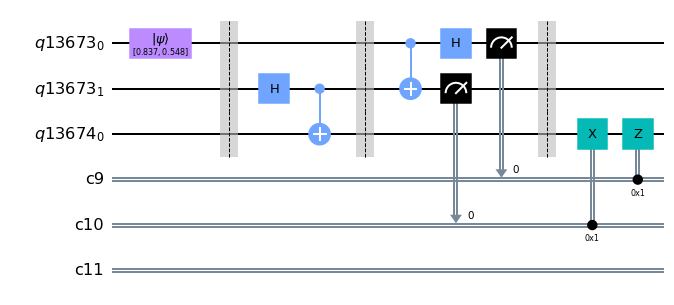

In [157]:
### imports
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

### set up the qubits and classical bits
all_qubits_Alice = QuantumRegister(2)
all_qubits_Bob = QuantumRegister(1)
creg1_Alice = ClassicalRegister(1)
creg2_Alice = ClassicalRegister(1)
creg_target = ClassicalRegister(1)

### quantum teleportation circuit here
# Initialize
mycircuit = QuantumCircuit(all_qubits_Alice, all_qubits_Bob, creg1_Alice, creg2_Alice, creg_target)
initialize_qubit(mycircuit, 0)
mycircuit.barrier()
# Entangle
entangle_qubits(mycircuit, 1, 2)
mycircuit.barrier()
# Do a Bell measurement
bell_meas_Alice_qubits(mycircuit, all_qubits_Alice[0], all_qubits_Alice[1], creg1_Alice, creg2_Alice)
mycircuit.barrier()
# Apply classically controlled quantum gates
controlled_ops_Bob_qubit(mycircuit, all_qubits_Bob[0], creg1_Alice, creg2_Alice)

### Look at the complete circuit
mycircuit.draw(output='mpl')

Now you can add a measurement on creg_target and verify teleportation has happened

In [171]:
# add measure on Bob's qubit to Bob's c-bit (creg-target)
mycircuit.measure(all_qubits_Bob[0],creg_target[0])

# require needed objects for local sim xecution
from qiskit import execute, Aer
backend = Aer.get_backend('qasm_simulator')
result = execute(mycircuit, backend, shots=10000).result()

# dictionnaire qui reçoit les résultats
d = result.get_counts(mycircuit)

# because we had measurements already on Alices bit, the results are 3 qubits results
# we want to count (agregating) results 0 on one side and result 1 on the other side for 3rd qubit, 
# comes at left position (most significant bit) : position 0 => k[0]
### WRITE YOUR CODE BETWEEN THESE LINES - START

plot_histogram(d)

p0 = 0
p1 = 0
norm = 0
for key in ['0 0 0','0 0 1','0 1 0','0 1 1']:
    p0 += d[key]
    
for key in ['1 0 0','1 0 1','1 1 0','1 1 1']:
    p1 += d[key]
    
norm = p0 + p1
print('p0 = %s' %(p0/norm))
print('p1 = %s' %(p1/norm))
### WRITE YOUR CODE BETWEEN THESE LINES - END

p0 = 0.7006
p1 = 0.2994


# 3.3 Challenge 3 : Getting the best performance from the available machines

Create the non trivial state $Rx(\pi/5)|0\rangle$

Using the calibration data for the available machines, select the best 2 neighbours qubits for a swapp. 

<img src="./images/best-swap.png" alt="drawing" width="800"/>

Run and evaluate the result.

# The following cells give you an example on how to query qubit error rates data 

This is from : 
https://github.com/Qiskit/qiskit-tutorials/blob/master/tutorials/circuits_advanced/08_gathering_system_information.ipynb wheree you can find more information on this subject.

In [172]:
from qiskit import IBMQ # for provider access

In [173]:
IBMQ.load_account() # to autenticate using your API key, see Lab1 if needed 

/Users/clement/opt/anaconda3/envs/myquantumenv/lib/python3.8/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-03-13 20:28:33,087: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [174]:
selected_provider = IBMQ.get_provider(hub='ibm-q')  # select default provider ibm-q

In [175]:
selected_provider.backends() # optional : show me the backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_athens') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_santiago') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') fr

From there you could use that result to iterate on online backends having more than one qubit and which are not simulators. The following shows you some of the qiskit syntax you may use, to find the best 2 qubits  :

In [188]:
backend = selected_provider.get_backend('ibmq_santiago')  # for example

In [189]:
prop = backend.properties()
conf = backend.configuration()

In [229]:
for i in range(conf.n_qubits):
    print(f"Qubit {i} has a sx gate error of     {round(prop.gate_error('sx',i),4)} ")
              
for i in range(conf.n_qubits):
     print(f"Qubit {i} has a measurement error of {round(prop.readout_error(i),4)} ")
              
for c in conf.coupling_map:
    q_c = c[0]  # control qubit 
    q_t = c[1]  # target qubit
    print(f"Cx from Qubit {q_c} to Qubit {q_t} has error rate of {round(prop.gate_error('cx',(q_c,q_t)),4)}")

Qubit 0 has a sx gate error of     0.0006 
Qubit 1 has a sx gate error of     0.0011 
Qubit 2 has a sx gate error of     0.0005 
Qubit 3 has a sx gate error of     0.0003 
Qubit 4 has a sx gate error of     0.0002 
Qubit 0 has a measurement error of 0.0185 
Qubit 1 has a measurement error of 0.055 
Qubit 2 has a measurement error of 0.0506 
Qubit 3 has a measurement error of 0.0158 
Qubit 4 has a measurement error of 0.0091 
Cx from Qubit 0 to Qubit 1 has error rate of 0.0233
Cx from Qubit 1 to Qubit 0 has error rate of 0.0233
Cx from Qubit 1 to Qubit 2 has error rate of 0.0183
Cx from Qubit 2 to Qubit 1 has error rate of 0.0183
Cx from Qubit 2 to Qubit 3 has error rate of 0.01
Cx from Qubit 3 to Qubit 2 has error rate of 0.01
Cx from Qubit 3 to Qubit 4 has error rate of 0.0112
Cx from Qubit 4 to Qubit 3 has error rate of 0.0112


In [228]:
#when we consider only the swap gate
def find_min(conf):
    min_ = np.inf
    for c in conf.coupling_map:
        q_c = c[0]  # control qubit 
        q_t = c[1]  # target qubit
        if round(prop.gate_error('cx',(q_c,q_t)),4)<min_:
            min_ = round(prop.gate_error('cx',(q_c,q_t)),4)
            q_c_0 = c[0]
            q_t_0 = c[1]
    return q_c_0,q_t_0
# your code to find the "best" two neighbour qubits

print(find_min(conf))
def find_min_with_measure(conf):
    max_ = -np.inf
    for c in conf.coupling_map:
        q_c = c[0]  # control qubit 
        q_t = c[1]  # target qubit
        p_swap = round(prop.gate_error('cx',(q_c,q_t)),4)
        p_mes_1 = prop.readout_error(q_c)
        p_mes_2 = prop.readout_error(q_t)
        if np.log(1-p_swap)+np.log(1-p_mes_1)+np.log(1-p_mes_2)>max_:
            max_ = np.log(1-p_swap)+np.log(1-p_mes_1)+np.log(1-p_mes_2)
            q_c_0 = c[0]
            q_t_0 = c[1]
    return q_c_0,q_t_0

print(find_min_with_measure(conf))

(2, 3)
(3, 4)


### Can you generalize to find the best place to perform a swap between 2 qubits that are n qubits away ?

In [238]:
# your code here
import networkx as nx
G = nx.Graph()
G_weighted = nx.Graph()
for c in conf.coupling_map:
    q_c = c[0]  # control qubit 
    q_t = c[1]  # target qubit
    cost = -np.log(1-round(prop.gate_error('cx',(q_c,q_t)),4))
    print(cost)
    G_weighted.add_edge(q_c,q_t,weight = cost)
    G.add_edge(q_c,q_t,weight = 1)

0.02357573652870569
0.02357573652870569
0.018469516283661322
0.018469516283661322
0.01005033585350145
0.01005033585350145
0.011263192278710714
0.011263192278710714


In [240]:
N = 3
cost_tmp = np.inf
for node1 in G.nodes:
    for node2 in G.nodes:
        if node1 != node2:
            cost_dij , path = nx.single_source_dijkstra(G_weighted, source=node1, target=node2)
            cost_dist, _ =  nx.single_source_dijkstra(G, source=node1, target=node2)
            if cost_dist == N:
                if cost_dij < cost_tmp:
                    cost_tmp = cost_dij
                    fin_node1 = node1
                    fin_node2 = node2

                
print(fin_node1,fin_node2)

1 4
